# Scipy Presentation

Scipy is a python package that gives people access to a wide array of mathematical algorithms and convenience functions built on the NumPy extension of Python. Scipy allows users to manipulate and visualize data on a high-level. Scipy is a large package that is broken down into smaller subpackages. These subpackages include:

- cluster: Clustering algorithms
- constants: Physical and mathematical constants
- fftpack: Fast Fourier Transform routines
- integrate: Integration and ordinary differential equation solvers
- interpolate: Interpolation and smoothing splines
- io: Input and Output
- linalg: Linear algebra
- ndimage: N-dimensional image processing
- odr: Orthogonal distance regression
- optimize: Optimization and root-finding routines
- signal: Signal processing
- sparse: Sparse matrices and associated routines
- spatial: Spatial data structures and algorithms
- special: Special functions
- stats: Statistical distributions and functions

Because of the large scope of Scipy, in this presentation I will only be diving into two of the subpackages, interpolate and linalg, both of which are highly relevant to our class.

In [9]:
# imports 
from scipy.interpolate import CubicSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import splrep, BSpline
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np

## Interpolate

The interpole subpackage of Scipy has functions for one dimensional and multidimensional interpolation. In 1D, there are linear, cubic spline, monotone cubic spline, nearest, and non-cubic spline interpolation methods. In addition to 1D, there are methods for N-D curve, N-D regular grid, and N-D scattered intepolation.

Below are some examples of the 1D intepolation capabilities of Scipy.

### 1D Interpolation Example

#### Cubic Splines Interpolation 

Cubic Spline Interpolation via Scipy produces a smooth curve fitting the data. The curve is made up of cubic pieces which have matching first and second derivatives.

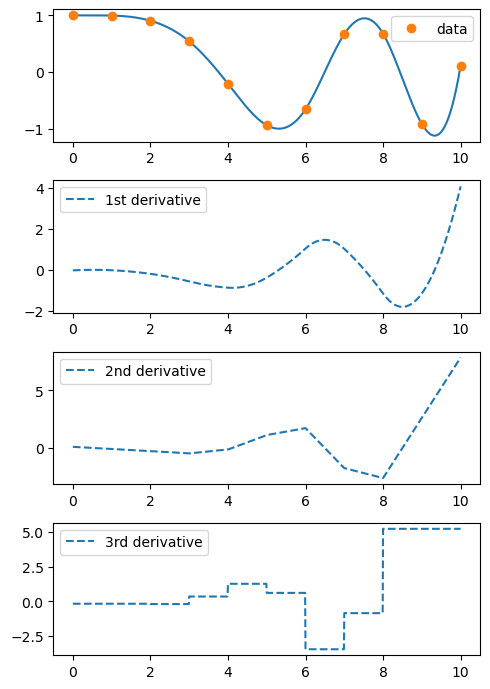

In [10]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.)
spl = CubicSpline(x, y)

fig, ax = plt.subplots(4, 1, figsize=(5, 7))
xnew = np.linspace(0, 10, num=1001)
ax[0].plot(xnew, spl(xnew))
ax[0].plot(x, y, 'o', label='data')
ax[1].plot(xnew, spl(xnew, nu=1), '--', label='1st derivative')
ax[2].plot(xnew, spl(xnew, nu=2), '--', label='2nd derivative')
ax[3].plot(xnew, spl(xnew, nu=3), '--', label='3rd derivative')
for j in range(4):
    ax[j].legend(loc='best')
plt.tight_layout()
plt.show()

### Smoothing Splines

When conducting interpolation, sometimes you want to find a function that goes through each data point, but when noisy data is present this is not the correct course of action. This is where smoothing splines comes in. Smoothing splines can be constructed to approximate the input data that generated the noisy data. 

We look for a spline function $g(x)$ that satistfies the following:

$$\sum_j [w_j(g(x_j) - y_j)]^2 \le s$$

In this equation s is the input parameter which controls the interplay between the smoothness of g(x) and how well it approximates the data. Finding a good value for s requires trial and error.

#### Spline Smoothing 1D Example

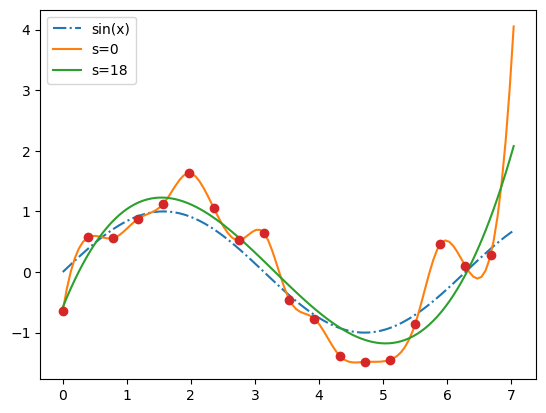

In [11]:
# Generate noisy data
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/16)
rng = np.random.default_rng()
y =  np.sin(x) + 0.4*rng.standard_normal(size=len(x))

# Construct two splines with different values for s
tck = splrep(x, y, s=0)
tck_s = splrep(x, y, s=len(x))

# Plot the results
xnew = np.arange(0, 9/4, 1/50) * np.pi
plt.plot(xnew, np.sin(xnew), '-.', label='sin(x)')
plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0')
plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}')
plt.plot(x, y, 'o')
plt.legend()
plt.show()

## Linalg

The Scipy linalg subpackage includes a variety of functions relating to linear algebra. This includes basic functions such as finding the inverse, determinant, and norm of matrices or vectors as well as more complex functions such as matrix decompositions.

### Basic Linalg Functions

In [19]:
# Finding the inverse
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
print(linalg.inv(A))

# Finding the determinant
B=np.array([[1,2],[3,4]])
print(linalg.det(B))

# Computing a norm
C=np.array([[4,2],[3,3]])
print(linalg.norm(C))

[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]
-2.0
6.164414002968976


### Matrix Decompositions

The Scipy linalg subpackage has functions for a number of matrix decompositions included Singular Value Decomposition, QR Decomposition, LU Decomposition, Cholesky Decomposition, Schur Decomposition, and Interpolative Decomposition.

#### Singular Value Decomposition Example
$$A = U\Sigma V^H$$

In [29]:
A = np.array([[1,2,3],[4,5,6]])

M,N = A.shape
U,s,Vh = linalg.svd(A)
Sig = linalg.diagsvd(s,M,N)
U, Vh = U, Vh

print("Sig")
print(Sig)
print("U")
print(U)
print("Vh")
print(Vh)

print("Verifying Solution")
print(U.dot(Sig.dot(Vh)))

Sig
[[9.508032   0.         0.        ]
 [0.         0.77286964 0.        ]]
U
[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
Vh
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]
Verifying Solution
[[1. 2. 3.]
 [4. 5. 6.]]


## Question

Are any of the methods provided by the Scipy library ill-conditioned?

## Possible Experiment

One possible experiment that could be conducted is comparing the speed and accuracy of different functions in the scipy libriary, such as the interpolation or SVD functions. The results of this comparison could then be expanded upon by comparing the speed and accuracy of scipy to similar packages or functions in other programming languages such as Julia.